**Following code insert drive into environment**



In the output cell of follwing some link would be shown. Login and allow access and the copy the password into the block below the link 

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

**Check if shows drive folder**

In [3]:
!ls

datalab  drive


**switch into drive folder(place code and data files into same folder and move to that folder simillar to cd)**

In [0]:
import os
os.chdir('drive/SOP')

In [5]:
!ls

100epochs_3channel.h5  model.ipynb		   tranfer_20ep_l2reg.h5
data_1.h5	       mycode.ipynb		   tranfer_20ep_overfit.h5
data.h5		       Testdata_SigComp2011	   trial.ipynb
data_s_gen.h5	       trainingSet
data_siamese.h5        tranfer_20ep_l2+dropout.h5


**Data preprocessing(Optinal as all files are already created)**

In [0]:
!wget http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-trainingSet.zip

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('sigComp2011-test.zip', 'r')
zip_ref.extractall('drive',pwd='I hereby accept the SigComp 2011 disclaimer.')
zip_ref.close()

In [0]:
import numpy as np
from PIL import Image
import pickle
import os
import pickle
import cv2

In [0]:
def Center(img, new_height, new_width):
    cImg = 255*np.ones((new_height,new_width,3))
    width =  np.size(img,1)
    height = np.size(img,0)

    left = int((new_width - width)/2.)
    top = int(((new_height - height)/2.))
    right = int(((width + new_width)/2.))
    bottom = int(((height + new_height)/2.))
    cImg[top:bottom, left:right,:] = img
    return cImg

In [0]:
x = []
y = []

j = k = 1
arr = []
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key=str.lower)

for i in range(len(path)):
    if(path[i][2] == str(j)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k + 1
    elif(j<10):
        j = j + 1
        print('j='+str(j))
    else:
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k+1
print('k='+str(k))        

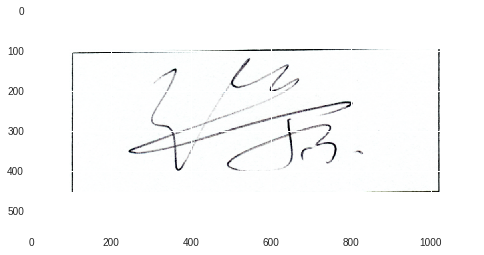

In [19]:
from matplotlib import pyplot as plt
plt.imshow(np.uint8(x[0]))
plt.show()

In [0]:
hf = h5py.File('data_1.h5', 'w')
hf.create_dataset('dataset_1', data=x)
hf.create_dataset('dataset_2', data=y)
hf.close()

Dataset for siamese networks

In [0]:
x = []

a = b = 0 
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key = str.lower)

for i in range(10):
  y = []
  for j in range(b,len(path)):
    if(path[j][3:6] == str(i+1).zfill(2)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[j]+'')
        #img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        arr = np.asarray(img)
        arr = Center(arr,551,1117)
        y.append(arr)
        a = a + 1
        print(a)
        if(a==235):
          x.append(y)
    else:
      print('...............')
      x.append(y)
      b = a
      break

In [0]:
hf = h5py.File('data_1.h5', 'w')
hf.create_dataset('dataset_1', data=x)


**Check above folder has the files**

import statements

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import h5py

import keras
from keras.models import  Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers

from keras.utils import np_utils

# InceptionV3 model imports
from keras.applications.inception_v3 import InceptionV3

from keras.models import load_model

Using TensorFlow backend.


**Load data**

In [0]:
hf = h5py.File('data_1.h5', 'r')
x = hf.get('dataset_1')
y = hf.get('dataset_2')

check if data is loaded

In [7]:
x[0].shape

(551, 1117, 3)

In [0]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]
X_train = x[0:200]
y_train = y[0:200]
X_val = x[200:226]
y_val = y[200:226]

**Define model(Optional)** (example for tranfer learning and small model created by me for comparison)

inceptionv3 for transfer learning

In [20]:
# InceptionV3 model imports
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(include_top = False, weights='imagenet', input_shape= (551,1117,3))

87916544/87910968 [==============================] - 5s 0us/step


In [0]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax')(x)

In [22]:
m = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 551, 1117, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 275, 558, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 275, 558, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 275, 558, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (


__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 15, 33, 768)  0           activation_83[0][0]              
                                                                 activation_84[0][0]              
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 15, 33, 192)  0           batch_normalization_85[0][0]     
__________________________________________________________________________________________________
mixed9 (Concatenate)            (None, 15, 33, 2048) 0           activation_77[0][0]              
                                                                 mixed9_0[0][0]                   
                                                                 concatenate_1[0][0]              
                                                                 activation_85[0][0]              
_________

my model for comparison

In [23]:
 conv_activation = 'relu'
deep_activation = 'relu'

input_shape = (551, 1117, 3)
num_classes = 10

model = Sequential()

model.add(
	Conv2D(
		16,
		kernel_size=(8, 8),
		strides=(1, 1),
		activation=conv_activation,
		input_shape=input_shape,
		data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# model.add(Dense(100, activation=deep_activation))
model.add(Dense(100, activation=deep_activation))
model.add(Dense(50, activation=deep_activation))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 544, 1110, 16)     3088      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 272, 555, 16)      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 257, 540, 16)      65552     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 270, 16)      0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 113, 255, 16)      65552     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 127, 16)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 63, 16)        0         
__________

**load model(provide path accordingly) **

go to runtime and change the runtime type to GPU

In [0]:
model = load_model('tranfer_20ep_l2+dropout.h5')

**train model(optinal)**

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 20, batch_size= 32, verbose=2)

Train on 200 samples, validate on 26 samples
Epoch 1/20
 - 36s - loss: 1.3924 - acc: 0.5450 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 2/20
 - 19s - loss: 1.3239 - acc: 0.5950 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 3/20
 - 19s - loss: 1.4369 - acc: 0.4900 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 4/20
 - 19s - loss: 1.3536 - acc: 0.5550 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 5/20
 - 19s - loss: 1.3495 - acc: 0.5250 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 6/20
 - 19s - loss: 1.3491 - acc: 0.5850 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 7/20
 - 19s - loss: 1.3246 - acc: 0.5800 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 8/20
 - 19s - loss: 1.3612 - acc: 0.5100 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 9/20
 - 19s - loss: 1.3102 - acc: 0.5750 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 10/20
 - 19s - loss: 1.3434 - acc: 0.5200 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 11/20
 - 19s - loss: 1.2986 - acc: 0.5850 - val_loss: 15.7582 - val_acc: 0.0385
Epoch 12/20
 - 19s

In [0]:
model.save('tranfer_20ep_l2+dropout.h5')

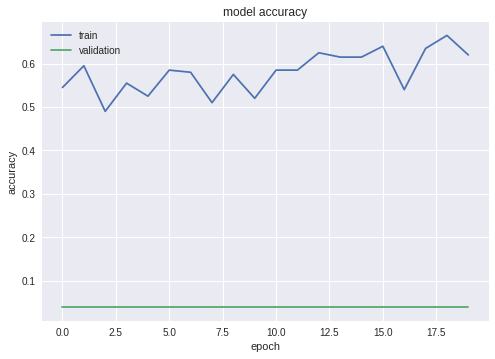

In [11]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

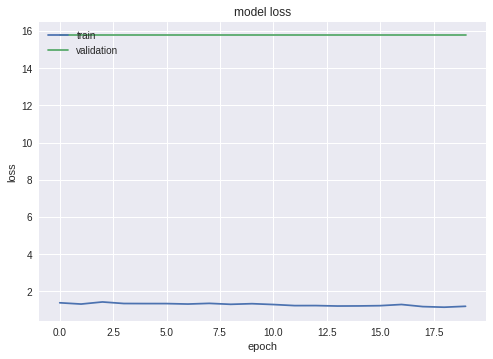

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**testing model(load_model if not trained in above code snippet)**

In [0]:
model = load_model('tranfer_20ep_l2+dropout.h5')

In [0]:
hf = h5py.File('data_1.h5', 'r')
x = hf.get('dataset_1')
y = hf.get('dataset_2')

In [0]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]
X_test = x[0:100]
y_test = y[0:100]

In [17]:
history = model.evaluate(x=X_test, y=y_test, batch_size= 16 ,verbose=1)


100/100 [==============================] - 13s 131ms/step


In [18]:
history

[14.822666625976563, 0.09]